In [47]:
from functools import partial
import matplotlib.pyplot as plt
from teyssier.sedov import sedovana
from superfv.euler_solver import EulerSolver
from superfv.initial_conditions import sedov

In [48]:
dim = 2
gamma = 1.4
E0 = 1
rho0 = 1
T = 0.8

r, d, u, P = sedovana(gamma, dim)

r *= (E0 / rho0) ** (1.0 / (dim + 2)) * T ** (2 / (dim + 2))
d *= rho0
u *= (E0 / rho0) ** (1.0 / (dim + 2)) * T ** (-dim / (dim + 2))
P *= (E0 / rho0) ** (2.0 / (dim + 2)) * T ** (-2 * dim / (dim + 2)) * rho0

chi0=np.float64(1.0018778777154949)


In [49]:
N = 32
p = 1
CFL = 0.8
riemann_solver = "llf"

sim_a_priori = EulerSolver(
    ic=partial(sedov, gamma=gamma, h=1 / N),
    bcx=("reflective", "free"),
    bcy=("reflective", "free"),
    riemann_solver=riemann_solver,
    CFL=CFL,
    gamma=gamma,
    nx=N,
    ny=N,
    p=p,
    flux_recipe=3,
    interpolation_scheme="gauss-legendre",
    lazy_primitives=True,
    # ZS=True,
    # adaptive_timestepping=False,
)
sim_a_priori.run(T, allow_overshoot=True)

100%|█████████▉| 0.7972734730610651/0.8 [00:02]   /Users/jonathan/miniconda3/envs/superfv/lib/python3.12/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 0.8009551813132495/0.8 [00:02]/Users/jonathan/miniconda3/envs/superfv/lib/python3.12/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 0.8009551813132495/0.8 [00:02]


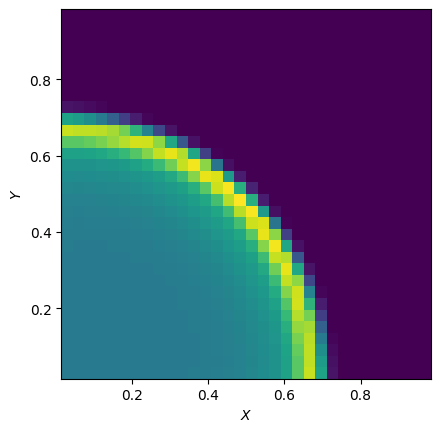

In [50]:
fig, axs = plt.subplots()

sim_a_priori.plot_2d_slice(
    axs,
    "P",
    array="w",
    x=None,
    y=None,
)

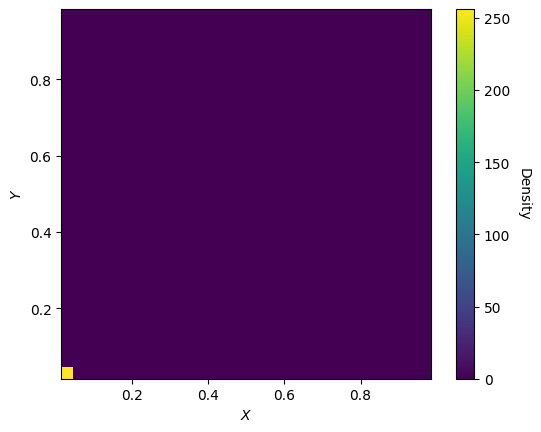

In [55]:
fig, axs = plt.subplots()

sim_a_priori.plot_2d_slice(axs, "E", array="u", x=None, y=None, t=0)
# colorbar
cbar = plt.colorbar(axs.images[0], ax=axs)
cbar.set_label("Density", rotation=270, labelpad=15)

/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.0 not found in array. Using nearest: 0.015625.
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.0 not found in array. Using nearest: 0.015625.
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.0 not found in array. Using nearest: 0.015625.
  warnings.warn(
/var/folders/_g/1khjnxg53bn4cl_8ttksw3pc0000gn/T/ipykernel_17322/3601290367.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()


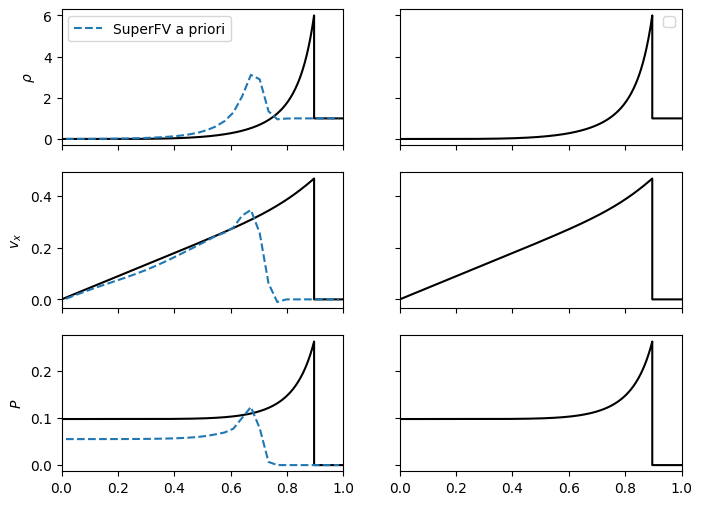

In [52]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey="row", figsize=(8, 6))

# rho
axs[0, 0].set_ylabel(r"$\rho$")
axs[0, 0].plot(r, d, color="k")
axs[0, 1].plot(r, d, color="k")
sim_a_priori.plot_1d_slice(
    axs[0, 0],
    "rho",
    array="w",
    x=None,
    y=0.0,
    marker="none",
    mfc="none",
    linestyle="--",
    label=r"SuperFV a priori",
)

# vx
axs[1, 0].set_ylabel(r"$v_x$")
axs[1, 0].plot(r, u, color="k")
axs[1, 1].plot(r, u, color="k")
sim_a_priori.plot_1d_slice(
    axs[1, 0],
    "vx",
    array="w",
    x=None,
    y=0.0,
    marker="none",
    mfc="none",
    linestyle="--",
    label=r"SuperFV a priori",
)

# P
axs[2, 0].set_ylabel(r"$P$")
axs[2, 0].plot(r, P, color="k")
axs[2, 1].plot(r, P, color="k")
sim_a_priori.plot_1d_slice(
    axs[2, 0],
    "P",
    array="w",
    x=None,
    y=0.0,
    marker="none",
    mfc="none",
    linestyle="--",
    label=r"SuperFV a priori",
)


axs[2, 0].set_xlim(0, 1)
axs[2, 1].set_xlim(0, 1)
axs[0, 0].legend()
axs[0, 1].legend()